# Solar Power Forecasting Using Vector Auto Regression

1. Read labeled data from output.xlsx
2. Set forecast_days
3. Generate probabilistic labels
4. Run VAR

In [47]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR 
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [48]:
#run mark

In [49]:
forecast_days = 10

In [50]:
xls = pd.ExcelFile("output.xlsx")

In [51]:
years = ["2012","2013","2014","2015","2016","2017","2018","2019","2020"]

In [52]:
df_obj = dict()
for i in years:
    df_obj[i] = pd.read_excel(xls, i)
    df_obj[i] = df_obj[i].drop(["Unnamed: 0"],axis=True)

## Forecasting start

In [53]:
df_obj['2015'].columns

Index(['Date', '1104500527', '1104500529', '1.104501e+09', '7802195.0',
       '2100570073/ 2100567820/ 2100567898', 'Total Generation (KWH)',
       'Aggregate Meter Reading (KWH)', 'Difference', 'SEEDs data (KWH)',
       'Insolation', 'PR (%)', 'Any Issues/Problems Observed', 'WO#',
       'NO-OFF-CLEAN MODULES', 'Grid Failure', 'Inverter', 'Module Cleaning',
       'Rainy day', 'No Module Cleaning',
       'Transformer replacement and maintenance', 'Cable and Fuse maintenance',
       'Plant Shutdown', 'Internet', 'Battery', 'Cloudy',
       'Module Cleaning by rains'],
      dtype='object')

In [54]:
df = df_obj['2012']
# df = df.append(df_obj['2016'])
for i in range(2013,2019):
    df = df.append(df_obj[str(i)])
    
df1 = df.drop([
                    "1104500527", "1104500529", "1.104501e+09", "7802195.0", "2100570073/ 2100567820/ 2100567898", 
                    "Aggregate Meter Reading (KWH)", 
                    "Difference", "SEEDs data (KWH)",  
                    "PR (%)", "Any Issues/Problems Observed", "WO#"], axis=1)

C:\Users\Rajeshsingh\AppData\Local\Temp\ipykernel_7764\2648422872.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_obj[str(i)])
C:\Users\Rajeshsingh\AppData\Local\Temp\ipykernel_7764\2648422872.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_obj[str(i)])
C:\Users\Rajeshsingh\AppData\Local\Temp\ipykernel_7764\2648422872.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_obj[str(i)])
C:\Users\Rajeshsingh\AppData\Local\Temp\ipykernel_7764\2648422872.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_obj[str(i)])
C:\Users\Rajeshsingh\AppData\Local\Temp\ipykerne

In [55]:
df1['Insolation'] = df1['Insolation'].fillna(df1['Insolation'].mean())
# df1 = df1.fillna(0)

In [56]:
df1['NO-OFF-CLEAN MODULES'] = df1['NO-OFF-CLEAN MODULES'].replace(r'^\s*$', np.nan, regex=True)
df1['NO-OFF-CLEAN MODULES'] = df1['NO-OFF-CLEAN MODULES'].fillna(0)

In [57]:
df1['NO-OFF-CLEAN MODULES'] = pd.to_numeric(df1['NO-OFF-CLEAN MODULES'])

In [58]:
df1

Date  Total Generation (KWH)  Insolation  Grid Failure  Inverter  \
0   2012-07-06                 3218.00     9.37536             1         0   
1   2012-07-07                 3633.00     9.37536             1         0   
2   2012-07-08                 4377.00     9.37536             0         1   
3   2012-07-09                 4625.00     9.37536             0         1   
4   2012-07-10                  648.00     9.37536             0         1   
..         ...                     ...         ...           ...       ...   
360 2018-12-27                 4129.29     5.74700             1         0   
361 2018-12-28                 4266.50     5.68900             0         0   
362 2018-12-29                 3732.03     5.83400             1         0   
363 2018-12-30                 4063.88     5.58400             0         1   
364 2018-12-31                 4093.90     5.63500             1         0   

     Module Cleaning  Rainy day  No Module Cleaning  \
0                  0          0                   0   
1                  0          0                   0   
2                  0          0                   0   
3                  0          0                   0   
4                  0          0                   0   
..               ...        ...                 ...   
360                1          0                   0   
361                1          0                   0   
362                1          0                   0   
363                0          0                   0   
364                1          0                   0   

     Transformer replacement and maintenance  Cable and Fuse maintenance  \
0                                          0                           0   
1                                          0                           0   
2                                          0                           0   
3                                          0                           0   
4                                          0                           0   
..                                       ...                         ...   
360                                        0                           0   
361                                        0                           0   
362                                        0                           0   
363                                        0                           0   
364                                        0                           0   

     Plant Shutdown  Internet  Battery  Cloudy  Module Cleaning by rains  \
0                 0         0        0       0                         0   
1                 0         0        0       0                         0   
2                 0         0        0       0                         0   
3                 0         0        0       0                         0   
4                 0         0        0       0                         0   
..              ...       ...      ...     ...                       ...   
360               0         0        0       0                         0   
361               0         0        0       0                         0   
362               0         0        0       0                         0   
363               0         0        0       0                         0   
364               0         0        0       0                         0   

     NO-OFF-CLEAN MODULES  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  
..                    ...  
360                 971.0  
361                   0.0  
362                 720.0  
363                   0.0  
364                1122.0  

[2370 rows x 16 columns]

In [59]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [60]:
df1 = df1.set_index('Date')

In [61]:
# for i in df1.columns[1:]:
#     print(i)
#     temp = df1[i].value_counts().to_dict()
#     print(temp)
#     if 1.0 in temp.keys():
#         df1[str(i)][df1[str(i)] == 1.0] = (temp[1.0]/100)**12

In [62]:
df1.head()

Total Generation (KWH)  Insolation  Grid Failure  Inverter  \
Date                                                                     
2012-07-06                  3218.0     9.37536             1         0   
2012-07-07                  3633.0     9.37536             1         0   
2012-07-08                  4377.0     9.37536             0         1   
2012-07-09                  4625.0     9.37536             0         1   
2012-07-10                   648.0     9.37536             0         1   

            Module Cleaning  Rainy day  No Module Cleaning  \
Date                                                         
2012-07-06                0          0                   0   
2012-07-07                0          0                   0   
2012-07-08                0          0                   0   
2012-07-09                0          0                   0   
2012-07-10                0          0                   0   

            Transformer replacement and maintenance  \
Date                                                  
2012-07-06                                        0   
2012-07-07                                        0   
2012-07-08                                        0   
2012-07-09                                        0   
2012-07-10                                        0   

            Cable and Fuse maintenance  Plant Shutdown  Internet  Battery  \
Date                                                                        
2012-07-06                           0               0         0        0   
2012-07-07                           0               0         0        0   
2012-07-08                           0               0         0        0   
2012-07-09                           0               0         0        0   
2012-07-10                           0               0         0        0   

            Cloudy  Module Cleaning by rains  NO-OFF-CLEAN MODULES  
Date                                                                
2012-07-06       0                         0                   0.0  
2012-07-07       0                         0                   0.0  
2012-07-08       0                         0                   0.0  
2012-07-09       0                         0                   0.0  
2012-07-10       0                         0                   0.0

In [63]:
df1['Total Generation (KWH)'] = pd.to_numeric(df1['Total Generation (KWH)'])
df1['Total Generation (KWH)'].dtype

dtype('float64')

In [64]:
corr_df = df1.corr()
# corr_df[corr_df < 0] = 0
corr_df

Total Generation (KWH)  Insolation  \
Total Generation (KWH)                                 1.000000   -0.024524   
Insolation                                            -0.024524    1.000000   
Grid Failure                                          -0.130600   -0.014171   
Inverter                                              -0.314601    0.003589   
Module Cleaning                                        0.128121   -0.019096   
Rainy day                                             -0.243720   -0.007896   
No Module Cleaning                                    -0.005216   -0.005430   
Transformer replacement and maintenance               -0.050500   -0.002112   
Cable and Fuse maintenance                             0.032419   -0.005786   
Plant Shutdown                                         0.014604   -0.000670   
Internet                                               0.058770   -0.001732   
Battery                                               -0.042502   -0.003606   
Cloudy                                                -0.430203   -0.010411   
Module Cleaning by rains                                    NaN         NaN   
NO-OFF-CLEAN MODULES                                  -0.009910   -0.000011   

                                         Grid Failure  Inverter  \
Total Generation (KWH)                      -0.130600 -0.314601   
Insolation                                  -0.014171  0.003589   
Grid Failure                                 1.000000  0.057966   
Inverter                                     0.057966  1.000000   
Module Cleaning                              0.028741 -0.240594   
Rainy day                                    0.006965  0.345086   
No Module Cleaning                          -0.071054 -0.065587   
Transformer replacement and maintenance     -0.008649  0.047602   
Cable and Fuse maintenance                  -0.004769 -0.057207   
Plant Shutdown                               0.027274 -0.006944   
Internet                                     0.007146 -0.045619   
Battery                                     -0.006409  0.107890   
Cloudy                                      -0.026162  0.170230   
Module Cleaning by rains                          NaN       NaN   
NO-OFF-CLEAN MODULES                         0.027293 -0.007084   

                                         Module Cleaning  Rainy day  \
Total Generation (KWH)                          0.128121  -0.243720   
Insolation                                     -0.019096  -0.007896   
Grid Failure                                    0.028741   0.006965   
Inverter                                       -0.240594   0.345086   
Module Cleaning                                 1.000000  -0.097901   
Rainy day                                      -0.097901   1.000000   
No Module Cleaning                             -0.138123  -0.026688   
Transformer replacement and maintenance         0.046175   0.022688   
Cable and Fuse maintenance                      0.036938  -0.004281   
Plant Shutdown                                  0.028864  -0.002826   
Internet                                       -0.103348  -0.022166   
Battery                                        -0.076412  -0.014764   
Cloudy                                         -0.206888   0.304770   
Module Cleaning by rains                             NaN        NaN   
NO-OFF-CLEAN MODULES                            0.029442  -0.002883   

                                         No Module Cleaning  \
Total Generation (KWH)                            -0.005216   
Insolation                                        -0.005430   
Grid Failure                                      -0.071054   
Inverter                                          -0.065587   
Module Cleaning                                   -0.138123   
Rainy day                                         -0.026688   
No Module Cleaning                                 1.000000   
Transformer replacement and maintenance           -0.017444   

In [65]:
# total_0 = 0
# total_1 = 0
# for i in df1.columns[1:]:
#     value_c = df1[i].value_counts()
#     print(df1[i].value_counts())
#     total_0 += value_c[]

In [66]:
df1 = df1.drop(["Cable and Fuse maintenance","NO-OFF-CLEAN MODULES", "No Module Cleaning","Rainy day", "Insolation" ,"Transformer replacement and maintenance","Plant Shutdown","Internet","Battery","Module Cleaning by rains"], axis=1)
df1

Total Generation (KWH)  Grid Failure  Inverter  Module Cleaning  \
Date                                                                          
2012-07-06                 3218.00             1         0                0   
2012-07-07                 3633.00             1         0                0   
2012-07-08                 4377.00             0         1                0   
2012-07-09                 4625.00             0         1                0   
2012-07-10                  648.00             0         1                0   
...                            ...           ...       ...              ...   
2018-12-27                 4129.29             1         0                1   
2018-12-28                 4266.50             0         0                1   
2018-12-29                 3732.03             1         0                1   
2018-12-30                 4063.88             0         1                0   
2018-12-31                 4093.90             1         0                1   

            Cloudy  
Date                
2012-07-06       0  
2012-07-07       0  
2012-07-08       0  
2012-07-09       0  
2012-07-10       0  
...            ...  
2018-12-27       0  
2018-12-28       0  
2018-12-29       0  
2018-12-30       0  
2018-12-31       0  

[2370 rows x 5 columns]

In [67]:
endog_array = df1.to_numpy(dtype=int)
print(endog_array.shape)
endog_array

(2370, 5)


array([[3218,    1,    0,    0,    0],
       [3633,    1,    0,    0,    0],
       [4377,    0,    1,    0,    0],
       ...,
       [3732,    1,    0,    1,    0],
       [4063,    0,    1,    0,    0],
       [4093,    1,    0,    1,    0]])

In [68]:
var_model = VAR(endog_array)

In [69]:
var_model.select_order(48).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [70]:
results = var_model.fit(30, trend='c', ic='aic')

In [71]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 12, Dec, 2022
Time:                     19:11:39
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    3.51735
Nobs:                     2355.00    HQIC:                   2.92594
Log likelihood:          -19374.5    FPE:                    13.2944
AIC:                      2.58723    Det(Omega_mle):         11.3422
--------------------------------------------------------------------
Results for equation y1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const        429.308862       103.472155            4.149           0.000
L1.y1          0.565818         0.021648           26.137           0.000
L1.y2         96.226095        31.150276            3.089           0.002
L1.y3        -94.

0.02164810016066973
0.024771498679911116
0.02483676245533024
0.024842935667163158
0.0248584212876696
0.024940387629293344
0.02494226924866736
0.024933831372270225
0.024951523287980323
0.024992567812099617
0.02485617123743019
0.024763893249157936
0.02479101675738902
0.024788014767129753
0.021828458838513212


Text(0, 0.5, 'std. error')

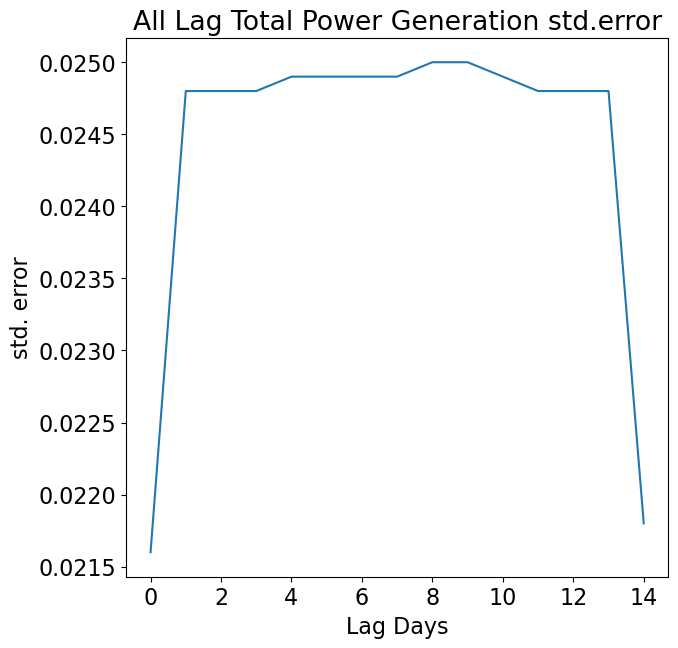

In [72]:
stderr_value = list(results.stderr)[1:]
error_value = []
for i in range(75):
    if i % 5 == 0:
        print(stderr_value[i][0])
        error_value.append(round(stderr_value[i][0],4))
fig = plt.figure(figsize=(7,7))
plt.plot(error_value)    
plt.title("All Lag Total Power Generation std.error")
plt.xlabel('Lag Days')
plt.ylabel('std. error')

In [73]:
# fig.savefig('std_error')

In [74]:
for i in list(results.stderr):
    for j in i:
        print(round(j,3))

103.472
0.071
0.033
0.041
0.027
0.022
0.0
0.0
0.0
0.0
31.15
0.021
0.01
0.012
0.008
67.859
0.046
0.022
0.027
0.018
54.294
0.037
0.017
0.022
0.014
81.286
0.055
0.026
0.032
0.021
0.025
0.0
0.0
0.0
0.0
31.341
0.021
0.01
0.013
0.008
70.966
0.048
0.023
0.028
0.019
55.56
0.038
0.018
0.022
0.015
90.551
0.062
0.029
0.036
0.024
0.025
0.0
0.0
0.0
0.0
31.38
0.021
0.01
0.013
0.008
71.634
0.049
0.023
0.029
0.019
55.851
0.038
0.018
0.022
0.015
91.038
0.062
0.029
0.036
0.024
0.025
0.0
0.0
0.0
0.0
31.297
0.021
0.01
0.012
0.008
71.63
0.049
0.023
0.029
0.019
56.242
0.038
0.018
0.022
0.015
91.411
0.062
0.029
0.036
0.024
0.025
0.0
0.0
0.0
0.0
31.287
0.021
0.01
0.012
0.008
71.512
0.049
0.023
0.029
0.019
56.265
0.038
0.018
0.022
0.015
91.623
0.063
0.029
0.037
0.024
0.025
0.0
0.0
0.0
0.0
31.241
0.021
0.01
0.012
0.008
71.31
0.049
0.023
0.028
0.019
56.203
0.038
0.018
0.022
0.015
91.539
0.062
0.029
0.037
0.024
0.025
0.0
0.0
0.0
0.0
31.192
0.021
0.01
0.012
0.008
71.222
0.049
0.023
0.028
0.019
56.133
0.038
0.018
0

In [75]:
for index, i in enumerate(list(results.stderr)):
    print(index, i)

0 [1.03472155e+02 7.06148308e-02 3.31345858e-02 4.12717604e-02
 2.73032639e-02]
1 [2.16481002e-02 1.47738001e-05 6.93230784e-06 8.63474047e-06
 5.71229808e-06]
2 [3.11502756e+01 2.12585835e-02 9.97516172e-03 1.24248569e-02
 8.21964322e-03]
3 [6.78586017e+01 4.63102724e-02 2.17301617e-02 2.70666437e-02
 1.79058928e-02]
4 [5.42935245e+01 3.70527515e-02 1.73862567e-02 2.16559647e-02
 1.43264671e-02]
5 [8.12858784e+01 5.54737509e-02 2.60299392e-02 3.24223584e-02
 2.14489569e-02]
6 [2.47714987e-02 1.69053712e-05 7.93250462e-06 9.88056506e-06
 6.53647125e-06]
7 [3.13406321e+01 2.13884927e-02 1.00361190e-02 1.25007840e-02
 8.26987271e-03]
8 [7.09658945e+01 4.84308521e-02 2.27252010e-02 2.83060442e-02
 1.87258161e-02]
9 [5.55600045e+01 3.79170640e-02 1.77918178e-02 2.21611234e-02
 1.46606540e-02]
10 [9.05509670e+01 6.17967338e-02 2.89968715e-02 3.61179084e-02
 2.38937418e-02]
11 [2.48367625e-02 1.69499106e-05 7.95340385e-06 9.90659671e-06
 6.55369244e-06]
12 [3.13803323e+01 2.14155862e-02 1.00

In [76]:
lag = results.k_ar

In [77]:
forecast_results = results.forecast(df1.values[-lag:],steps=forecast_days)

## Results

In [78]:
forecast_power = []
# insolation_pred = []
grid_pred = []
inverter_pred = []
module_pred = []
module_no_pred= []
cloudy_pred = []
for i in forecast_results:
    forecast_power.append(i[0])
#     insolation_pred.append(i[1])
    grid_pred.append(i[1])
    inverter_pred.append(i[2])
    module_pred.append(i[3])
#     module_no_pred.append(i[5])
    cloudy_pred.append(i[4])

In [79]:
forecast_list_dict = dict()
for col in df1.columns:
    forecast_list_dict[col] = []
for i in forecast_results:
    for j, col_name in zip(range(len(i)), df1.columns):
        forecast_list_dict[col_name].append(i[j]) 

In [80]:
# forecast_list_dict

In [81]:
power_16 = df_obj['2019']['Total Generation (KWH)']
diff_power = pd.DataFrame({"Prediction":forecast_power[:forecast_days],"Original":power_16[:forecast_days],
#                            "Insolation_pred" : insolation_pred[:forecast_days],
                           "Grid_pred":grid_pred[:forecast_days],
                          "Module_pred":module_pred[:forecast_days],
                            "Cloudy_pred":cloudy_pred[:forecast_days],
                          "Inverter_pred":inverter_pred[:forecast_days],
#                            "NO-OFF-CLEAN MODULES" : module_no_pred[:forecast_days]
                          })
diff_power['Difference'] = diff_power['Prediction'] - diff_power['Original']
diff_power

Prediction  Original  Grid_pred  Module_pred  Cloudy_pred  Inverter_pred  \
0  4006.415791   3812.94   0.487502     0.919024     0.013340       0.134071   
1  4018.499292   3920.74   0.421920     0.938666    -0.020539       0.074634   
2  4176.960999   4113.45   0.411235     0.924108    -0.006022       0.113328   
3  4119.503935   3873.59   0.372910     0.883409    -0.001627       0.104822   
4  3921.924689   3603.61   0.558229     0.943164     0.006326       0.079327   
5  3916.175485   4401.37   0.394121     0.269509     0.027434       0.299704   
6  3903.286758   3852.56   0.548953     0.986328     0.034072       0.063813   
7  3875.556369   3913.55   0.456653     0.823999     0.074195       0.145397   
8  4044.455014   3731.08   0.339145     0.835986     0.033584       0.128262   
9  3992.133402   4058.75   0.376363     0.850405     0.043758       0.084118   

   Difference  
0  193.475791  
1   97.759292  
2   63.510999  
3  245.913935  
4  318.314689  
5 -485.194515  
6   50.726758  
7  -37.993631  
8  313.375014  
9  -66.616598

## Plot results

In [82]:
date_list = pd.date_range(start="2019-01-01",end="2019-12-31")
date_list = pd.to_datetime(date_list)
diff_power['Date'] = date_list[:forecast_days]

In [83]:
diff_power

Prediction  Original  Grid_pred  Module_pred  Cloudy_pred  Inverter_pred  \
0  4006.415791   3812.94   0.487502     0.919024     0.013340       0.134071   
1  4018.499292   3920.74   0.421920     0.938666    -0.020539       0.074634   
2  4176.960999   4113.45   0.411235     0.924108    -0.006022       0.113328   
3  4119.503935   3873.59   0.372910     0.883409    -0.001627       0.104822   
4  3921.924689   3603.61   0.558229     0.943164     0.006326       0.079327   
5  3916.175485   4401.37   0.394121     0.269509     0.027434       0.299704   
6  3903.286758   3852.56   0.548953     0.986328     0.034072       0.063813   
7  3875.556369   3913.55   0.456653     0.823999     0.074195       0.145397   
8  4044.455014   3731.08   0.339145     0.835986     0.033584       0.128262   
9  3992.133402   4058.75   0.376363     0.850405     0.043758       0.084118   

   Difference       Date  
0  193.475791 2019-01-01  
1   97.759292 2019-01-02  
2   63.510999 2019-01-03  
3  245.913935 2019-01-04  
4  318.314689 2019-01-05  
5 -485.194515 2019-01-06  
6   50.726758 2019-01-07  
7  -37.993631 2019-01-08  
8  313.375014 2019-01-09  
9  -66.616598 2019-01-10

In [84]:
rmse = mean_squared_error(power_16[:forecast_days],forecast_power)**(1/2)
rmse

235.56175830267725

In [85]:
mae = mean_absolute_error(power_16[:forecast_days],forecast_power)
mae

187.28812211818436

In [86]:
rmspe = round(np.sqrt(np.mean(np.square(((power_16[:forecast_days] - forecast_power) / power_16[:forecast_days])), axis=0))*100,3)
rmspe

5.917

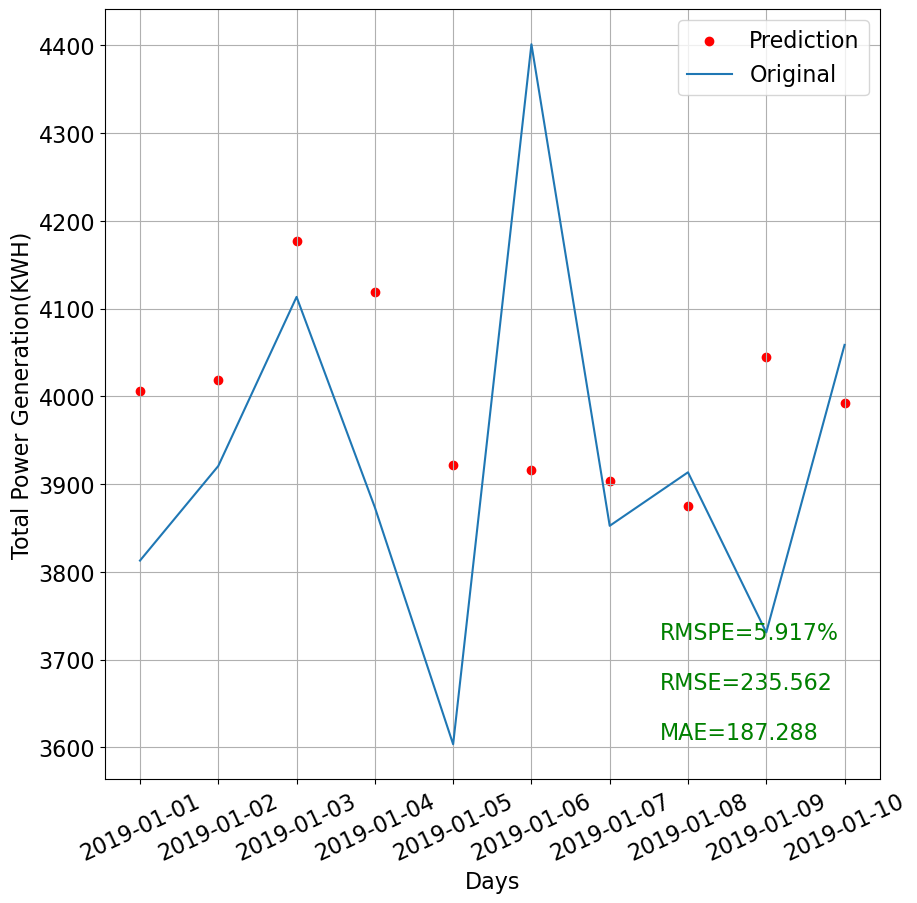

In [87]:
fig = plt.figure(figsize=(10,10))
font = {'size': 16}
plt.rc('font', **font)
plt.scatter('Date', 'Prediction', data=diff_power, label='Prediction', c='r')
plt.plot('Date', 'Original', data=diff_power, label='Original')
plt.legend()
plt.figtext(.68, .25, "RMSPE="+str(round(rmspe, 3))+"%", c='g')
plt.figtext(.68, .2, "RMSE="+str(round(rmse, 3)), c='g')
plt.figtext(.68, .15, "MAE="+str(round(mae, 3)), c='g')
plt.xticks(rotation=25)
plt.grid()
plt.xlabel("Days")
plt.ylabel("Total Power Generation(KWH)")
plt.show()
# plt.title(str(forecast_days)+'_Days Prediction_for_Binary_Var', fontsize=30)

In [168]:
#fig.savefig("result/"+str(forecast_days)+'_Days Prediction_for_Binary', dpi=500)

### Seasonality

In [89]:
def load_clean(year:str,till:str):
    df_jun = df_obj[year]
    # df = df.append(df_obj['2016'])
    # for i in range(2013, 2019):
    #    df_jun = df_jun.append(df_obj[str(i)])

    df1_jun = df_jun.drop([
        "1104500527", "1104500529", "1.104501e+09", "7802195.0", "2100570073/ 2100567820/ 2100567898",
        "Aggregate Meter Reading (KWH)",
        "Difference", "SEEDs data (KWH)",
        "PR (%)", "Any Issues/Problems Observed", "WO#"], axis=1)
    df1_jun['Insolation'] = df1_jun['Insolation'].fillna(
        df1_jun['Insolation'].mean())
    # df1 = df1.fillna(0)
    df1_jun['NO-OFF-CLEAN MODULES'] = df1_jun['NO-OFF-CLEAN MODULES'].replace(
        r'^\s*$', np.nan, regex=True)
    df1_jun['NO-OFF-CLEAN MODULES'] = df1_jun['NO-OFF-CLEAN MODULES'].fillna(0)
    df1_jun['NO-OFF-CLEAN MODULES'] = pd.to_numeric(
        df1_jun['NO-OFF-CLEAN MODULES'])
    df1_jun['Date'] = pd.to_datetime(df1_jun['Date'])
    df1_jun = df1_jun.set_index('Date')
    df1_jun = df1_jun[:till]
    return df1_jun


In [90]:
def to_taken(df1_jun):
    return df1_jun[['Total Generation (KWH)','Grid Failure','Inverter','Module Cleaning','Cloudy']]

In [91]:
def apply_var(df1):
    # applying var
    endog_array = df1.to_numpy(dtype=int)
    print(endog_array.shape)
    endog_array

    # var model
    var_model = VAR(endog_array)
    print('------------- model applied summery -------------')
    print(var_model.select_order(48).summary())

    # result of var
    print('------------- Result -------------')
    results = var_model.fit(30, trend='c', ic='aic')
    print(results.summary())
    return results

In [92]:
def plot_try(results):
    stderr_value = list(results.stderr)[1:]
    error_value = []
    for i in range(75):
        if i % 5 == 0:
            print(stderr_value[i][0])
            error_value.append(round(stderr_value[i][0], 4))
    fig = plt.figure(figsize=(7, 7))
    plt.plot(error_value)
    plt.title("All Lag Total Power Generation std.error")
    plt.xlabel('Lag Days')
    plt.ylabel('std. error')


In [93]:
def forcast(res, dat):
    print('lag is: ', res.k_ar)
    print('forcast is : --->')
    return res.forecast(dat.values[-lag:], steps=forecast_days) 


In [94]:
def prediction(forecast_results):
    forecast_power = []
    # insolation_pred = []
    grid_pred = []
    inverter_pred = []
    module_pred = []
    module_no_pred = []
    cloudy_pred = [] 
    for i in forecast_results:
        forecast_power.append(i[0])
    #     insolation_pred.append(i[1])
        grid_pred.append(i[1])
        inverter_pred.append(i[2])
        module_pred.append(i[3])
    #     module_no_pred.append(i[5])
        cloudy_pred.append(i[4])

    forecast_list_dict = {col: [] for col in df1.columns}
    for i in forecast_results:
        for j, col_name in zip(range(len(i)), df1.columns):
            forecast_list_dict[col_name].append(i[j])

    power_16 = df_obj['2019']['Total Generation (KWH)']
    diff_power = pd.DataFrame({"Prediction": forecast_power[:forecast_days], "Original": power_16[:forecast_days],
                               #                            "Insolation_pred" : insolation_pred[:forecast_days],
                               "Grid_pred": grid_pred[:forecast_days],
                               "Module_pred": module_pred[:forecast_days],
                               "Cloudy_pred": cloudy_pred[:forecast_days],
                               "Inverter_pred": inverter_pred[:forecast_days],
                               #                            "NO-OFF-CLEAN MODULES" : module_no_pred[:forecast_days]
                               })
    diff_power['Difference'] = diff_power['Prediction'] - \
        diff_power['Original']
    return power_16, diff_power


In [95]:
def plot_result(power_16, diff_power):
    rmse = mean_squared_error(power_16[:forecast_days], forecast_power)**(1/2)

    mae = mean_absolute_error(power_16[:forecast_days], forecast_power)

    rmspe = round(np.sqrt(np.mean(np.square(((power_16[:forecast_days] - forecast_power) / power_16[:forecast_days])), axis=0))*100,3)

    fig = plt.figure(figsize=(10, 10))
    font = {'size': 16}
    plt.rc('font', **font)
    plt.scatter('Date', 'Prediction', data=diff_power, label='Prediction', c='r')
    plt.plot('Date', 'Original', data=diff_power, label='Original')
    plt.legend()
    plt.figtext(.68, .25, "RMSPE="+str(round(rmspe, 3))+"%", c='g')
    plt.figtext(.68, .2, "RMSE="+str(round(rmse, 3)), c='g')
    plt.figtext(.68, .15, "MAE="+str(round(mae, 3)), c='g')
    plt.xticks(rotation=25)
    plt.grid()
    plt.xlabel("Days")
    plt.ylabel("Total Power Generation(KWH)")
    plt.show()
    # plt.title(str(forecast_days)+'_Days Prediction_for_Binary_Var', fontsize=30)
    return rmse, mae, rmspe


for June

In [96]:
dat = load_clean('2019','2019-05-31')
dat

Total Generation (KWH)  Insolation  NO-OFF-CLEAN MODULES  \
Date                                                                   
2019-01-01                 3812.94       5.357                 524.0   
2019-01-02                 3920.74       5.380                 441.0   
2019-01-03                 4113.45       5.598                 903.0   
2019-01-04                 3873.59       5.136                1281.0   
2019-01-05                 3603.61       4.808                 792.0   
...                            ...         ...                   ...   
2019-05-27                 4228.21       6.336                   0.0   
2019-05-28                 4244.22       6.303                   0.0   
2019-05-29                 4291.19       6.287                   0.0   
2019-05-30                 4324.33       6.358                   0.0   
2019-05-31                 4173.33       6.163                   0.0   

            Grid Failure  Inverter  Module Cleaning  Rainy day  \
Date                                                             
2019-01-01             1         0                1          0   
2019-01-02             1         0                1          0   
2019-01-03             1         0                1          0   
2019-01-04             0         0                1          0   
2019-01-05             0         0                1          0   
...                  ...       ...              ...        ...   
2019-05-27             1         0                0          0   
2019-05-28             1         0                0          0   
2019-05-29             0         0                0          0   
2019-05-30             0         0                0          0   
2019-05-31             0         0                0          0   

            No Module Cleaning  Transformer replacement and maintenance  \
Date                                                                      
2019-01-01                   0                                        0   
2019-01-02                   0                                        0   
2019-01-03                   0                                        0   
2019-01-04                   0                                        0   
2019-01-05                   0                                        0   
...                        ...                                      ...   
2019-05-27                   0                                        0   
2019-05-28                   0                                        0   
2019-05-29                   0                                        0   
2019-05-30                   0                                        0   
2019-05-31                   0                                        0   

            Cable and Fuse maintenance  Plant Shutdown  Internet  Battery  \
Date                                                                        
2019-01-01                           0               0         0        0   
2019-01-02                           0               0         0        0   
2019-01-03                           0               0         0        0   
2019-01-04                           0               0         0        0   
2019-01-05                           0               0         0        0   
...                                ...             ...       ...      ...   
2019-05-27                           0               0         0        0   
2019-05-28                           0               0         0        0   
2019-05-29                           0               0         0        0   
2019-05-30                           0               0         0        0   
2019-05-31                           1               0         0        0   

            Cloudy  Module Cleaning by rains  
Date                                          
2019-01-01       0                         0  
2019-01-02       0                         0  
2019-01-03       0                         0  
201

In [97]:
dat = to_taken(dat)
dat

Total Generation (KWH)  Grid Failure  Inverter  Module Cleaning  \
Date                                                                          
2019-01-01                 3812.94             1         0                1   
2019-01-02                 3920.74             1         0                1   
2019-01-03                 4113.45             1         0                1   
2019-01-04                 3873.59             0         0                1   
2019-01-05                 3603.61             0         0                1   
...                            ...           ...       ...              ...   
2019-05-27                 4228.21             1         0                0   
2019-05-28                 4244.22             1         0                0   
2019-05-29                 4291.19             0         0                0   
2019-05-30                 4324.33             0         0                0   
2019-05-31                 4173.33             0         0                0   

            Cloudy  
Date                
2019-01-01       0  
2019-01-02       0  
2019-01-03       0  
2019-01-04       0  
2019-01-05       0  
...            ...  
2019-05-27       0  
2019-05-28       0  
2019-05-29       0  
2019-05-30       0  
2019-05-31       0  

[151 rows x 5 columns]

In [98]:
dat = df1.append(dat)
dat

C:\Users\Rajeshsingh\AppData\Local\Temp\ipykernel_7764\3123098088.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dat = df1.append(dat)


Total Generation (KWH)  Grid Failure  Inverter  Module Cleaning  \
Date                                                                          
2012-07-06                 3218.00             1         0                0   
2012-07-07                 3633.00             1         0                0   
2012-07-08                 4377.00             0         1                0   
2012-07-09                 4625.00             0         1                0   
2012-07-10                  648.00             0         1                0   
...                            ...           ...       ...              ...   
2019-05-27                 4228.21             1         0                0   
2019-05-28                 4244.22             1         0                0   
2019-05-29                 4291.19             0         0                0   
2019-05-30                 4324.33             0         0                0   
2019-05-31                 4173.33             0         0                0   

            Cloudy  
Date                
2012-07-06       0  
2012-07-07       0  
2012-07-08       0  
2012-07-09       0  
2012-07-10       0  
...            ...  
2019-05-27       0  
2019-05-28       0  
2019-05-29       0  
2019-05-30       0  
2019-05-31       0  

[2521 rows x 5 columns]

In [99]:
res = apply_var(dat)

(2521, 5)
------------- model applied summery -------------
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        6.191       6.203       488.4       6.195
1        3.506       3.577       33.33       3.532
2        3.230       3.359       25.28       3.277
3        3.122       3.310       22.70       3.191
4        3.074       3.321       21.64       3.164
5        3.045       3.351       21.01       3.156
6        3.024       3.389       20.58       3.157
7        2.754      3.177*       15.70       2.907
8        2.707       3.188       14.98      2.882*
9        2.702       3.243       14.91       2.898
10       2.709       3.308       15.01       2.927
11       2.704       3.362       14.94       2.943
12       2.701       3.418       14.90       2.962
13       2.709       3.485       15.02       2.991
14       2.647       3.482       14.11       2.950
15      2.631*       3

0.02099750288551885
0.02397904915244832
0.024031742911558508
0.024033982457955117
0.024036382250268034
0.02409739840784964
0.024091622313993498
0.024086153542383037
0.02409686013185982
0.024146015890242487
0.0240120036152195
0.02392501478152608
0.023950418610218467
0.023936139044340103
0.02116188592620221


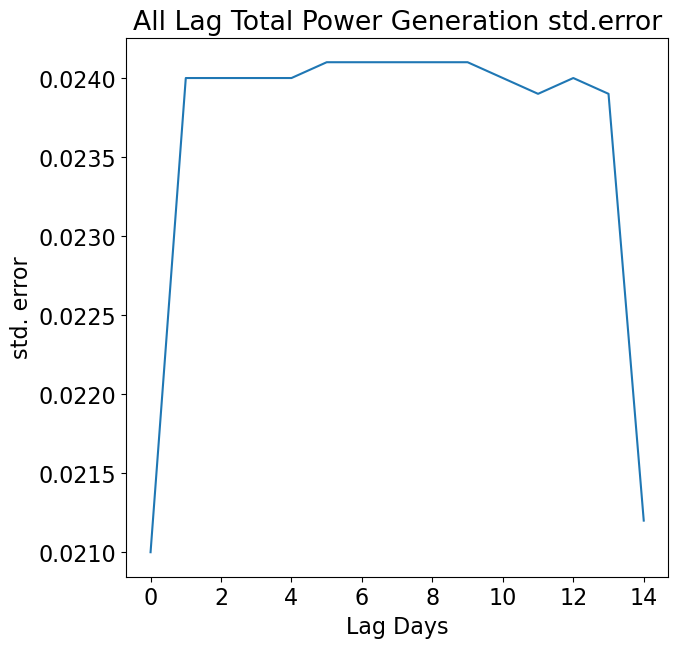

In [100]:
plot_try(res)

In [101]:
for i in list(res.stderr):
    for j in i:
        print(round(j, 3))

100.658
0.07
0.032
0.041
0.029
0.021
0.0
0.0
0.0
0.0
29.547
0.021
0.009
0.012
0.008
65.614
0.046
0.021
0.027
0.019
50.883
0.035
0.016
0.021
0.014
73.027
0.051
0.023
0.03
0.021
0.024
0.0
0.0
0.0
0.0
29.733
0.021
0.01
0.012
0.008
68.244
0.048
0.022
0.028
0.019
51.688
0.036
0.017
0.021
0.015
79.563
0.055
0.025
0.033
0.023
0.024
0.0
0.0
0.0
0.0
29.756
0.021
0.01
0.012
0.008
68.874
0.048
0.022
0.028
0.02
52.114
0.036
0.017
0.021
0.015
80.213
0.056
0.026
0.033
0.023
0.024
0.0
0.0
0.0
0.0
29.692
0.021
0.01
0.012
0.008
68.9
0.048
0.022
0.028
0.02
52.447
0.037
0.017
0.022
0.015
80.521
0.056
0.026
0.033
0.023
0.024
0.0
0.0
0.0
0.0
29.652
0.021
0.009
0.012
0.008
68.805
0.048
0.022
0.028
0.02
52.453
0.037
0.017
0.022
0.015
80.861
0.056
0.026
0.033
0.023
0.024
0.0
0.0
0.0
0.0
29.623
0.021
0.009
0.012
0.008
68.608
0.048
0.022
0.028
0.019
52.409
0.037
0.017
0.022
0.015
80.837
0.056
0.026
0.033
0.023
0.024
0.0
0.0
0.0
0.0
29.585
0.021
0.009
0.012
0.008
68.507
0.048
0.022
0.028
0.019
52.299
0.036
0.017

In [102]:
for index, i in enumerate(list(res.stderr)):
    print(index, i)

0 [1.00657944e+02 7.01700224e-02 3.22273239e-02 4.13498901e-02
 2.85831393e-02]
1 [2.09975029e-02 1.46376450e-05 6.72270167e-06 8.62569214e-06
 5.96251548e-06]
2 [2.95467887e+01 2.05974685e-02 9.45989847e-03 1.21377053e-02
 8.39019697e-03]
3 [6.56143281e+01 4.57406410e-02 2.10075243e-02 2.69541096e-02
 1.86320464e-02]
4 [5.08826577e+01 3.54709931e-02 1.62909337e-02 2.09023970e-02
 1.44487959e-02]
5 [7.30269165e+01 5.09080572e-02 2.33807885e-02 2.99991720e-02
 2.07369478e-02]
6 [2.39790492e-02 1.67161215e-05 7.67729356e-06 9.85049970e-06
 6.80916453e-06]
7 [2.97325382e+01 2.07269570e-02 9.51936928e-03 1.22140105e-02
 8.44294297e-03]
8 [6.82443082e+01 4.75740359e-02 2.18495564e-02 2.80344952e-02
 1.93788636e-02]
9 [5.16884027e+01 3.60326889e-02 1.65489065e-02 2.12333939e-02
 1.46775978e-02]
10 [7.95633734e+01 5.54647103e-02 2.54735445e-02 3.26843229e-02
 2.25930602e-02]
11 [2.40317429e-02 1.67528550e-05 7.69416435e-06 9.87214609e-06
 6.82412761e-06]
12 [2.97560049e+01 2.07433159e-02 9.52

In [103]:
forecast_results = forcast(res, dat)
forecast_results

lag is:  15
forcast is : --->


array([[4.18260604e+03, 2.69898970e-01, 3.90124471e-02, 1.59402909e-02,
        1.07577074e-02],
       [4.21823273e+03, 3.34386636e-01, 2.27158930e-02, 2.32163684e-02,
        6.69252168e-03],
       [4.13553213e+03, 3.12582468e-01, 6.96922082e-02, 1.29353912e-02,
        2.67143839e-02],
       [4.07278427e+03, 2.94421997e-01, 1.16658690e-02, 4.08287853e-02,
        1.15063899e-02],
       [4.15904803e+03, 3.65815711e-01, 2.24183924e-02, 2.85351059e-02,
        2.79234164e-02],
       [4.24351625e+03, 4.46548765e-01, 9.52631438e-03, 3.13777104e-02,
        1.48460569e-02],
       [4.24370618e+03, 3.66502432e-01, 2.49178154e-02, 3.72954315e-02,
        1.80323230e-02],
       [4.25939836e+03, 3.09449722e-01, 3.16684504e-02, 5.58857249e-02,
        1.92456516e-02],
       [4.25822452e+03, 3.14594001e-01, 7.89676634e-03, 7.47889474e-02,
        2.74473566e-02],
       [4.23457040e+03, 3.11914472e-01, 3.61023480e-02, 4.40397812e-02,
        2.03712104e-02]])

In [104]:
power_16, diff_power = prediction(forecast_results)

In [105]:
date_list = pd.date_range(start="2019-06-01", end="2019-12-31")
date_list = pd.to_datetime(date_list)
diff_power['Date'] = date_list[:forecast_days]
diff_power


Prediction  Original  Grid_pred  Module_pred  Cloudy_pred  Inverter_pred  \
0  4182.606040   3812.94   0.269899     0.015940     0.010758       0.039012   
1  4218.232735   3920.74   0.334387     0.023216     0.006693       0.022716   
2  4135.532132   4113.45   0.312582     0.012935     0.026714       0.069692   
3  4072.784273   3873.59   0.294422     0.040829     0.011506       0.011666   
4  4159.048034   3603.61   0.365816     0.028535     0.027923       0.022418   
5  4243.516251   4401.37   0.446549     0.031378     0.014846       0.009526   
6  4243.706184   3852.56   0.366502     0.037295     0.018032       0.024918   
7  4259.398361   3913.55   0.309450     0.055886     0.019246       0.031668   
8  4258.224515   3731.08   0.314594     0.074789     0.027447       0.007897   
9  4234.570403   4058.75   0.311914     0.044040     0.020371       0.036102   

   Difference       Date  
0  369.666040 2019-06-01  
1  297.492735 2019-06-02  
2   22.082132 2019-06-03  
3  199.194273 2019-06-04  
4  555.438034 2019-06-05  
5 -157.853749 2019-06-06  
6  391.146184 2019-06-07  
7  345.848361 2019-06-08  
8  527.144515 2019-06-09  
9  175.820403 2019-06-10

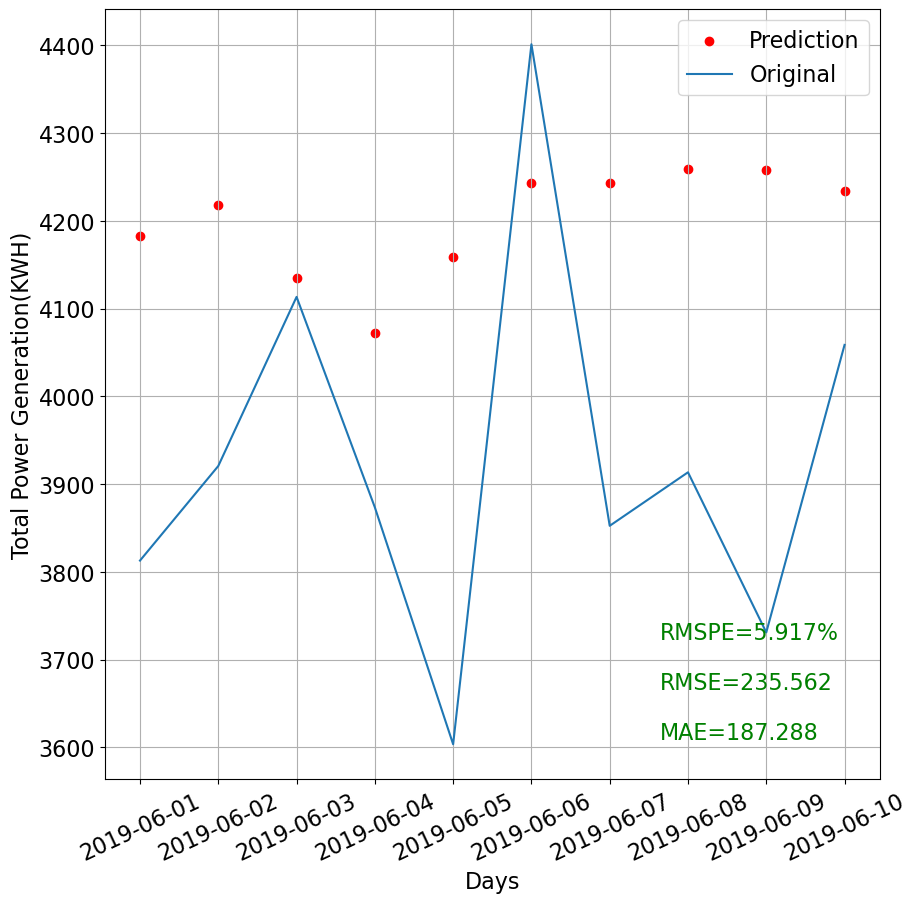

rmse: 235.56175830267725 
 mae: 187.28812211818436 
 rmspe: 5.917


In [106]:
rmse, mae, rmspe = plot_result(power_16, diff_power)
print('rmse:',rmse, '\n mae:',mae, '\n rmspe:',rmspe)

for september

In [107]:
dat = load_clean('2019', '2019-08-31')
dat

Total Generation (KWH)  Insolation  NO-OFF-CLEAN MODULES  \
Date                                                                   
2019-01-01                 3812.94       5.357                 524.0   
2019-01-02                 3920.74       5.380                 441.0   
2019-01-03                 4113.45       5.598                 903.0   
2019-01-04                 3873.59       5.136                1281.0   
2019-01-05                 3603.61       4.808                 792.0   
...                            ...         ...                   ...   
2019-08-27                 1640.14       2.294                   0.0   
2019-08-28                 1872.94       2.823                   0.0   
2019-08-29                 2928.05       4.073                   0.0   
2019-08-30                 3527.85       5.247                   0.0   
2019-08-31                 1953.35       2.752                   0.0   

            Grid Failure  Inverter  Module Cleaning  Rainy day  \
Date                                                             
2019-01-01             1         0                1          0   
2019-01-02             1         0                1          0   
2019-01-03             1         0                1          0   
2019-01-04             0         0                1          0   
2019-01-05             0         0                1          0   
...                  ...       ...              ...        ...   
2019-08-27             0         0                0          0   
2019-08-28             1         0                0          0   
2019-08-29             0         0                0          0   
2019-08-30             0         0                0          0   
2019-08-31             1         0                0          0   

            No Module Cleaning  Transformer replacement and maintenance  \
Date                                                                      
2019-01-01                   0                                        0   
2019-01-02                   0                                        0   
2019-01-03                   0                                        0   
2019-01-04                   0                                        0   
2019-01-05                   0                                        0   
...                        ...                                      ...   
2019-08-27                   0                                        0   
2019-08-28                   0                                        0   
2019-08-29                   0                                        0   
2019-08-30                   0                                        0   
2019-08-31                   0                                        0   

            Cable and Fuse maintenance  Plant Shutdown  Internet  Battery  \
Date                                                                        
2019-01-01                           0               0         0        0   
2019-01-02                           0               0         0        0   
2019-01-03                           0               0         0        0   
2019-01-04                           0               0         0        0   
2019-01-05                           0               0         0        0   
...                                ...             ...       ...      ...   
2019-08-27                           0               0         0        0   
2019-08-28                           0               0         0        0   
2019-08-29                           0               0         0        0   
2019-08-30                           0               0         0        0   
2019-08-31                           0               0         0        0   

            Cloudy  Module Cleaning by rains  
Date                                          
2019-01-01       0                         0  
2019-01-02       0                         0  
2019-01-03       0                         0  
201

In [108]:
dat = to_taken(dat)
dat

Total Generation (KWH)  Grid Failure  Inverter  Module Cleaning  \
Date                                                                          
2019-01-01                 3812.94             1         0                1   
2019-01-02                 3920.74             1         0                1   
2019-01-03                 4113.45             1         0                1   
2019-01-04                 3873.59             0         0                1   
2019-01-05                 3603.61             0         0                1   
...                            ...           ...       ...              ...   
2019-08-27                 1640.14             0         0                0   
2019-08-28                 1872.94             1         0                0   
2019-08-29                 2928.05             0         0                0   
2019-08-30                 3527.85             0         0                0   
2019-08-31                 1953.35             1         0                0   

            Cloudy  
Date                
2019-01-01       0  
2019-01-02       0  
2019-01-03       0  
2019-01-04       0  
2019-01-05       0  
...            ...  
2019-08-27       0  
2019-08-28       1  
2019-08-29       0  
2019-08-30       0  
2019-08-31       1  

[243 rows x 5 columns]

In [109]:
dat = df1.append(dat)
dat

C:\Users\Rajeshsingh\AppData\Local\Temp\ipykernel_7764\3123098088.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dat = df1.append(dat)


Total Generation (KWH)  Grid Failure  Inverter  Module Cleaning  \
Date                                                                          
2012-07-06                 3218.00             1         0                0   
2012-07-07                 3633.00             1         0                0   
2012-07-08                 4377.00             0         1                0   
2012-07-09                 4625.00             0         1                0   
2012-07-10                  648.00             0         1                0   
...                            ...           ...       ...              ...   
2019-08-27                 1640.14             0         0                0   
2019-08-28                 1872.94             1         0                0   
2019-08-29                 2928.05             0         0                0   
2019-08-30                 3527.85             0         0                0   
2019-08-31                 1953.35             1         0                0   

            Cloudy  
Date                
2012-07-06       0  
2012-07-07       0  
2012-07-08       0  
2012-07-09       0  
2012-07-10       0  
...            ...  
2019-08-27       0  
2019-08-28       1  
2019-08-29       0  
2019-08-30       0  
2019-08-31       1  

[2613 rows x 5 columns]

In [110]:
res = apply_var(dat)

(2613, 5)
------------- model applied summery -------------
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        6.276       6.288       531.9       6.281
1        3.624       3.692       37.48       3.649
2        3.345       3.470       28.35       3.390
3        3.236       3.419       25.44       3.302
4        3.190       3.430       24.29       3.277
5        3.160       3.457       23.58       3.268
6        3.137       3.490       23.03       3.265
7        2.870      3.280*       17.63       3.019
8        2.823       3.290       16.82      2.992*
9        2.819       3.344       16.76       3.009
10       2.824       3.406       16.85       3.035
11       2.821       3.459       16.79       3.052
12       2.820       3.515       16.77       3.072
13       2.828       3.581       16.92       3.101
14       2.762       3.572       15.84       3.056
15      2.748*       3

0.020591917597055337
0.02348236560831222
0.02351453254322874
0.023521684993230926
0.023534018900363104
0.023587208263173537
0.02358972994282325
0.02359774101758996
0.02361150224034615
0.023636941627295245
0.023503265484146853
0.02341965348154835
0.023445662965009877
0.0234585952665199
0.020794232520594313


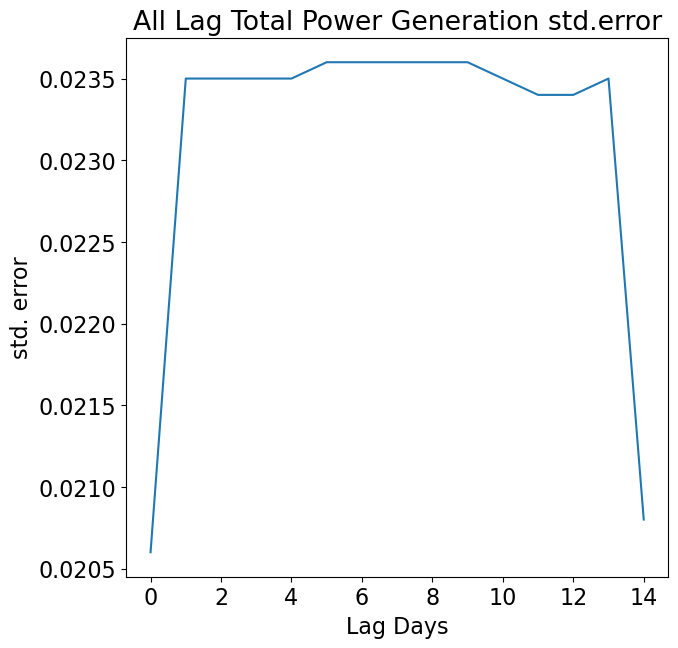

In [111]:
plot_try(res)

In [112]:
for i in list(res.stderr):
    for j in i:
        print(round(j, 3))


100.03
0.069
0.032
0.04
0.029
0.021
0.0
0.0
0.0
0.0
29.332
0.02
0.01
0.012
0.009
63.375
0.044
0.021
0.025
0.019
51.161
0.035
0.017
0.02
0.015
69.757
0.048
0.023
0.028
0.02
0.023
0.0
0.0
0.0
0.0
29.484
0.02
0.01
0.012
0.009
65.577
0.045
0.021
0.026
0.019
52.02
0.036
0.017
0.021
0.015
75.95
0.052
0.025
0.03
0.022
0.024
0.0
0.0
0.0
0.0
29.518
0.02
0.01
0.012
0.009
66.188
0.046
0.021
0.026
0.019
52.431
0.036
0.017
0.021
0.015
76.768
0.053
0.025
0.031
0.022
0.024
0.0
0.0
0.0
0.0
29.463
0.02
0.01
0.012
0.009
66.221
0.046
0.021
0.026
0.019
52.763
0.036
0.017
0.021
0.015
77.413
0.053
0.025
0.031
0.023
0.024
0.0
0.0
0.0
0.0
29.434
0.02
0.01
0.012
0.009
66.242
0.046
0.022
0.026
0.019
52.764
0.036
0.017
0.021
0.015
77.878
0.054
0.025
0.031
0.023
0.024
0.0
0.0
0.0
0.0
29.412
0.02
0.01
0.012
0.009
66.37
0.046
0.022
0.027
0.019
52.735
0.036
0.017
0.021
0.015
78.07
0.054
0.025
0.031
0.023
0.024
0.0
0.0
0.0
0.0
29.39
0.02
0.01
0.012
0.009
66.365
0.046
0.022
0.027
0.019
52.639
0.036
0.017
0.021
0.015
7

In [113]:
for index, i in enumerate(list(res.stderr)):
    print(index, i)


0 [1.00030216e+02 6.88951266e-02 3.24674540e-02 3.99777558e-02
 2.92210684e-02]
1 [2.05919176e-02 1.41825423e-05 6.68365185e-06 8.22969986e-06
 6.01536073e-06]
2 [2.93320076e+01 2.02022195e-02 9.52047939e-03 1.17227363e-02
 8.56853696e-03]
3 [6.33749808e+01 4.36490842e-02 2.05700273e-02 2.53282419e-02
 1.85132525e-02]
4 [5.11609861e+01 3.52367790e-02 1.66056521e-02 2.04468359e-02
 1.49452709e-02]
5 [6.97574138e+01 4.80449413e-02 2.26416149e-02 2.78790247e-02
 2.03777043e-02]
6 [2.34823656e-02 1.61733186e-05 7.62182325e-06 9.38488706e-06
 6.85972539e-06]
7 [2.94842115e+01 2.03070489e-02 9.56988120e-03 1.17835656e-02
 8.61299913e-03]
8 [6.55773320e+01 4.51659386e-02 2.12848587e-02 2.62084266e-02
 1.91566087e-02]
9 [5.20203916e+01 3.58286886e-02 1.68845949e-02 2.07903032e-02
 1.51963225e-02]
10 [7.59501147e+01 5.23101217e-02 2.46516199e-02 3.03539797e-02
 2.21867311e-02]
11 [2.35145325e-02 1.61954733e-05 7.63226388e-06 9.39774279e-06
 6.86912207e-06]
12 [2.95183835e+01 2.03305846e-02 9.58

In [114]:
forecast_results = forcast(res, dat)
forecast_results


lag is:  15
forcast is : --->


array([[ 2.32037085e+03,  1.09017524e-01,  3.14276272e-01,
        -1.52064062e-01,  6.82478063e-01],
       [ 2.97743414e+03,  3.29172415e-01,  2.58601163e-01,
        -1.36771183e-01,  6.23423174e-01],
       [ 3.06922460e+03,  3.68119841e-01,  5.42021841e-02,
        -9.27781370e-04,  4.69938118e-01],
       [ 3.17961014e+03,  2.87305653e-01,  1.00372856e-01,
         8.41475880e-02,  4.09605007e-01],
       [ 3.19293841e+03,  4.77103717e-01,  7.13536983e-02,
         1.06654386e-01,  4.03254845e-01],
       [ 2.94899881e+03,  2.53458859e-01,  3.02248961e-02,
         1.66923761e-01,  3.49998243e-01],
       [ 3.06769277e+03,  2.73426596e-01,  1.01826510e-01,
         7.45683936e-02,  4.58720547e-01],
       [ 2.97755865e+03,  2.81376868e-01,  7.16989134e-02,
         4.33810153e-02,  4.98490412e-01],
       [ 2.95873692e+03,  4.16208521e-01,  1.47133070e-01,
         6.58199119e-02,  4.51594891e-01],
       [ 3.03840220e+03,  3.81893439e-01,  1.83744206e-01,
         1.94933670e-02

In [115]:
power_16, diff_power = prediction(forecast_results)


In [116]:
date_list = pd.date_range(start="2019-09-01", end="2019-12-31")
date_list = pd.to_datetime(date_list)
diff_power['Date'] = date_list[:forecast_days]
diff_power


Prediction  Original  Grid_pred  Module_pred  Cloudy_pred  Inverter_pred  \
0  2320.370848   3812.94   0.109018    -0.152064     0.682478       0.314276   
1  2977.434141   3920.74   0.329172    -0.136771     0.623423       0.258601   
2  3069.224600   4113.45   0.368120    -0.000928     0.469938       0.054202   
3  3179.610142   3873.59   0.287306     0.084148     0.409605       0.100373   
4  3192.938413   3603.61   0.477104     0.106654     0.403255       0.071354   
5  2948.998807   4401.37   0.253459     0.166924     0.349998       0.030225   
6  3067.692770   3852.56   0.273427     0.074568     0.458721       0.101827   
7  2977.558654   3913.55   0.281377     0.043381     0.498490       0.071699   
8  2958.736920   3731.08   0.416209     0.065820     0.451595       0.147133   
9  3038.402198   4058.75   0.381893     0.019493     0.432003       0.183744   

    Difference       Date  
0 -1492.569152 2019-09-01  
1  -943.305859 2019-09-02  
2 -1044.225400 2019-09-03  
3  -693.979858 2019-09-04  
4  -410.671587 2019-09-05  
5 -1452.371193 2019-09-06  
6  -784.867230 2019-09-07  
7  -935.991346 2019-09-08  
8  -772.343080 2019-09-09  
9 -1020.347802 2019-09-10

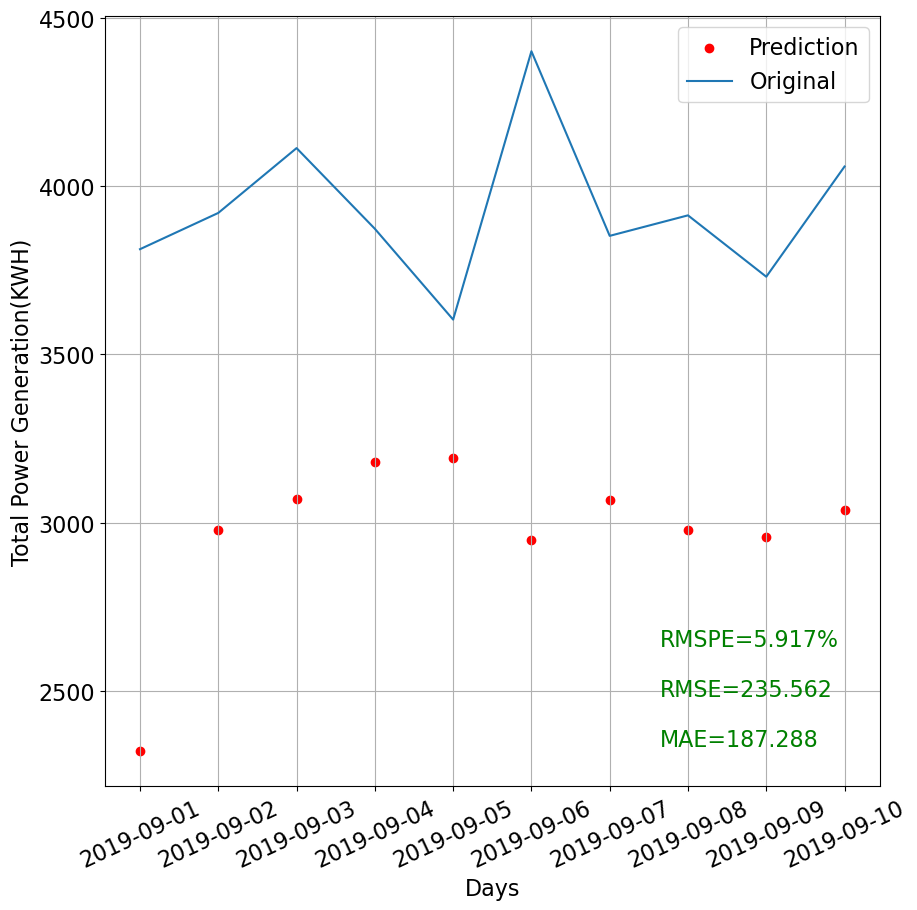

rmse: 235.56175830267725 
 mae: 187.28812211818436 
 rmspe: 5.917


In [117]:
rmse, mae, rmspe = plot_result(power_16, diff_power)
print('rmse:',rmse, '\n mae:',mae, '\n rmspe:',rmspe)

## Regression conversion

In [118]:
# new_diff_power =  

## Fetching results

In [119]:
# writer = pd.ExcelWriter('12_days.xlsx',engine='xlsxwriter')

In [120]:
# diff_power.to_excel(writer, sheet_name='12_days')

In [121]:
# writer.save()
# writer.close()

## Check the result with regressor

In [122]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
df1.head()

Total Generation (KWH)  Grid Failure  Inverter  Module Cleaning  \
Date                                                                          
2012-07-06                  3218.0             1         0                0   
2012-07-07                  3633.0             1         0                0   
2012-07-08                  4377.0             0         1                0   
2012-07-09                  4625.0             0         1                0   
2012-07-10                   648.0             0         1                0   

            Cloudy  
Date                
2012-07-06       0  
2012-07-07       0  
2012-07-08       0  
2012-07-09       0  
2012-07-10       0

In [124]:
df1.tail()

Total Generation (KWH)  Grid Failure  Inverter  Module Cleaning  \
Date                                                                          
2018-12-27                 4129.29             1         0                1   
2018-12-28                 4266.50             0         0                1   
2018-12-29                 3732.03             1         0                1   
2018-12-30                 4063.88             0         1                0   
2018-12-31                 4093.90             1         0                1   

            Cloudy  
Date                
2018-12-27       0  
2018-12-28       0  
2018-12-29       0  
2018-12-30       0  
2018-12-31       0

In [125]:
X_train = df1.drop(["Total Generation (KWH)"], axis=1)
Y_train = df1['Total Generation (KWH)']
X_test = diff_power.drop(["Prediction","Original","Difference","Date"], axis=1)

In [126]:
X_test

Grid_pred  Module_pred  Cloudy_pred  Inverter_pred
0   0.109018    -0.152064     0.682478       0.314276
1   0.329172    -0.136771     0.623423       0.258601
2   0.368120    -0.000928     0.469938       0.054202
3   0.287306     0.084148     0.409605       0.100373
4   0.477104     0.106654     0.403255       0.071354
5   0.253459     0.166924     0.349998       0.030225
6   0.273427     0.074568     0.458721       0.101827
7   0.281377     0.043381     0.498490       0.071699
8   0.416209     0.065820     0.451595       0.147133
9   0.381893     0.019493     0.432003       0.183744

In [127]:
Y_test = diff_power['Original']

In [128]:
X_test

Grid_pred  Module_pred  Cloudy_pred  Inverter_pred
0   0.109018    -0.152064     0.682478       0.314276
1   0.329172    -0.136771     0.623423       0.258601
2   0.368120    -0.000928     0.469938       0.054202
3   0.287306     0.084148     0.409605       0.100373
4   0.477104     0.106654     0.403255       0.071354
5   0.253459     0.166924     0.349998       0.030225
6   0.273427     0.074568     0.458721       0.101827
7   0.281377     0.043381     0.498490       0.071699
8   0.416209     0.065820     0.451595       0.147133
9   0.381893     0.019493     0.432003       0.183744

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
regr = RandomForestRegressor(max_depth=100, random_state=42)
regr.fit(X_train,Y_train)
Y_predrand = regr.predict(X_test)
print(mean_squared_error(Y_test, Y_predrand)**(1/2))
# print(r2_score(Y_test, Y_predrand))

511.6339325745221


c:\Users\Rajeshsingh\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Cloudy_pred
- Grid_pred
- Inverter_pred
- Module_pred
Feature names seen at fit time, yet now missing:
- Cloudy
- Grid Failure
- Inverter
- Module Cleaning

  warnings.warn(message, FutureWarning)


In [131]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}

In [132]:
clf = GridSearchCV(regr,parameters)
clf.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestRegressor(max_depth=100, random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [133]:
y_pred = clf.predict(X_test)
mean_squared_error(Y_test, y_pred)**(1/2)

c:\Users\Rajeshsingh\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Cloudy_pred
- Grid_pred
- Inverter_pred
- Module_pred
Feature names seen at fit time, yet now missing:
- Cloudy
- Grid Failure
- Inverter
- Module Cleaning

  warnings.warn(message, FutureWarning)


498.9379596325361

In [134]:
count = list(range(forecast_days))

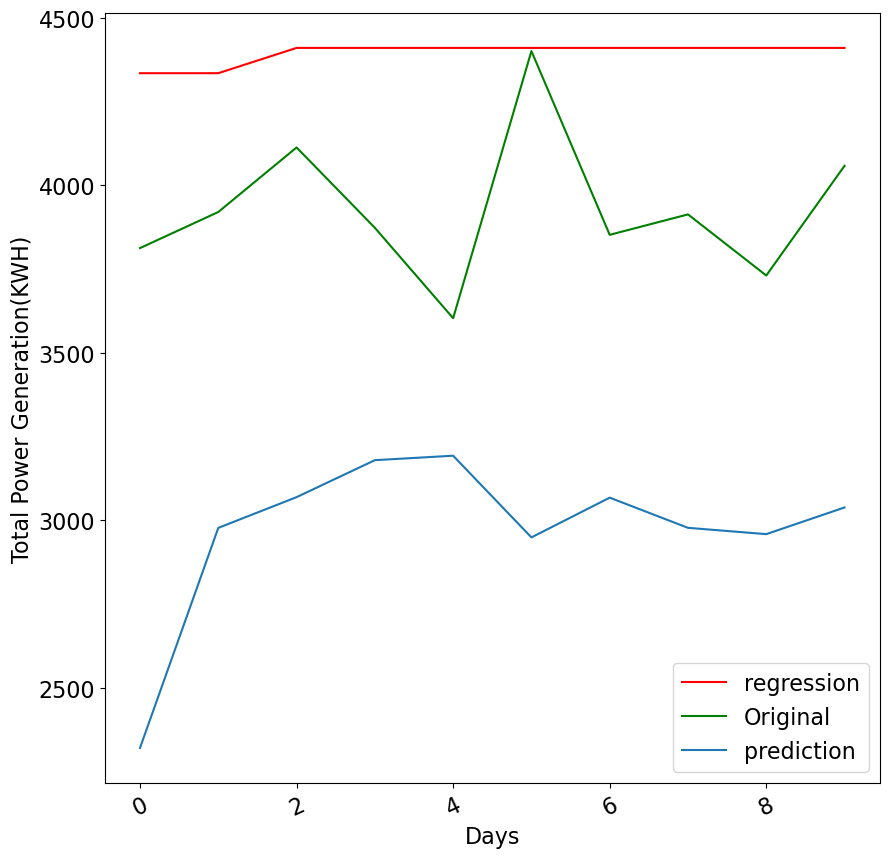

In [135]:
fig = plt.figure(figsize=(10,10))

plt.plot(count, Y_predrand, c="r", label="regression")
plt.plot(count, Y_test, c="g", label='Original')
plt.plot(count, diff_power['Prediction'], label='prediction')
# plt.figtext(.75, .25, "RMSPE="+str(round(rmspe, 3))+"%", c='g')
plt.legend()
plt.xlabel("Days")
plt.ylabel("Total Power Generation(KWH)")
plt.xticks(rotation=25)
plt.show()

In [136]:
fig.savefig("result/"+str(forecast_days)+'_Days Prediction_for_regression', dpi=500)

## Thresholding

In [137]:
threshold_dict = dict()
threshold_dict['Grid_pred'] = 0.4
threshold_dict['Module_pred'] = 0.85
threshold_dict['Cloudy_pred'] = 0.1
threshold_dict['Inverter_pred'] = 0.3


In [138]:
new_X_test = pd.DataFrame(columns=X_test.columns)

In [139]:
# new_X_test['Insolation_pred'] = X_test['Insolation_pred']
# new_X_test['NO-OFF-CLEAN MODULES'] = X_test['NO-OFF-CLEAN MODULES']

In [140]:
for index, row in X_test.iterrows():
    for key in threshold_dict.keys():
        if key in X_test.columns:
            if row[key] >= threshold_dict[key]:
                new_X_test.loc[index, key] = 1
            else:
                new_X_test.loc[index, key] = 0

In [141]:
new_X_test

Grid_pred Module_pred Cloudy_pred Inverter_pred
0         0           0           1             1
1         0           0           1             0
2         0           0           1             0
3         0           0           1             0
4         1           0           1             0
5         0           0           1             0
6         0           0           1             0
7         0           0           1             0
8         1           0           1             0
9         0           0           1             0

In [142]:
Y_predrand_thr = regr.predict(new_X_test)
print(mean_squared_error(Y_test, Y_predrand_thr)**(1/2))

359.8329549573267


c:\Users\Rajeshsingh\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Cloudy_pred
- Grid_pred
- Inverter_pred
- Module_pred
Feature names seen at fit time, yet now missing:
- Cloudy
- Grid Failure
- Inverter
- Module Cleaning

  warnings.warn(message, FutureWarning)


In [143]:
rmspe = round(np.sqrt(np.mean(np.square(((Y_test - Y_predrand_thr) / Y_test)), axis=0))*100,3)
rmspe

9.362

In [144]:
pd.set_option("display.max_columns", None)

In [145]:
all_data_of_2019 = df_obj['2019'][:forecast_days]

In [146]:
all_data_of_2019

Date  1104500527  1104500529  1.104501e+09  7802195.0  \
0 2019-01-01       814.0       990.0         947.0     1024.0   
1 2019-01-02       809.0      1023.0         988.0     1063.0   
2 2019-01-03       859.0      1046.0        1049.0     1119.0   
3 2019-01-04       803.0      1006.0         978.0     1048.0   
4 2019-01-05       775.0       944.0         907.0      943.0   
5 2019-01-06       944.0      1153.0        1109.0     1154.0   
6 2019-01-07       842.0      1007.0         972.0      993.0   
7 2019-01-08       842.0      1017.0         978.0     1038.0   
8 2019-01-09       798.0       955.0         928.0     1013.0   
9 2019-01-10       847.0      1035.0        1033.0     1104.0   

   2100570073/ 2100567820/ 2100567898  Total Generation (KWH)  \
0                               37.94                 3812.94   
1                               37.74                 3920.74   
2                               40.45                 4113.45   
3                               38.59                 3873.59   
4                               34.61                 3603.61   
5                               41.37                 4401.37   
6                               38.56                 3852.56   
7                               38.55                 3913.55   
8                               37.08                 3731.08   
9                               39.75                 4058.75   

   Aggregate Meter Reading (KWH)  Difference  SEEDs data (KWH)  Insolation  \
0                        3658.50      154.44            3816.0       5.357   
1                        3779.25      141.49            3924.0       5.380   
2                        3995.25      118.20            4117.0       5.598   
3                        3717.75      155.84            3877.0       5.136   
4                        3465.00      138.61            3607.0       4.808   
5                        4240.50      160.87            4405.0       5.946   
6                        3697.50      155.06            3860.0       5.184   
7                        3768.00      145.55            3920.0       5.260   
8                        3588.75      142.33            3735.0       5.008   
9                        3912.00      146.75            4062.0       5.336   

     PR (%)                       Any Issues/Problems Observed  WO#  \
0  0.694288  Grid Failure From-15:49 to 15:56, Module Clean...  NaN   
1  0.710885  Today morning time Inverter No :-4 ,ABB 250KW ...  NaN   
2  0.716804  Grid Failure From-17:19 to 17:20, Module Clean...  NaN   
3  0.735738  Module Cleaning has been done in Row-G,H,I,J,K...  NaN   
4  0.731197  Module Cleaning has been done in Row-A,B,C,D,E...  NaN   
5  0.722061                                                NaN  NaN   
6   0.72573  Module Cleaning has been done in Row-C,D,E,F  ...  NaN   
7  0.726362  Module Cleaning has been done in Row-,G,H,I,J,...  NaN   
8  0.726907  Grid Failure From-12:28 to 12:35, Module Clean...  NaN   
9  0.741954  Module Cleaning has been done in Row-K,L,M,N, ...  NaN   

   NO-OFF-CLEAN MODULES  Grid Failure  Inverter  Module Cleaning  Rainy day  \
0                 524.0             1         0                1          0   
1                 441.0             1         0                1          0   
2                 903.0             1         0                1          0   
3                1281.0             0         0                1          0   
4                 792.0             0         0                1          0   
5                   NaN             0         0                0          0   
6                 630.0             0         0                1          0   
7                 936.0             0         0                1          0   
8                 816.0             1         0                1          0   
9                 987.0             0         0                1          0   

   No Module Cleaning  Transformer replacement and maintenance  \

In [147]:
#df_obj['2019'][]

In [148]:
new_X_test

Grid_pred Module_pred Cloudy_pred Inverter_pred
0         0           0           1             1
1         0           0           1             0
2         0           0           1             0
3         0           0           1             0
4         1           0           1             0
5         0           0           1             0
6         0           0           1             0
7         0           0           1             0
8         1           0           1             0
9         0           0           1             0

In [149]:
rmspe = round(np.sqrt(np.mean(np.square(((Y_test - Y_predrand_thr) / Y_test)), axis=0))*100,3)
rmspe

9.362

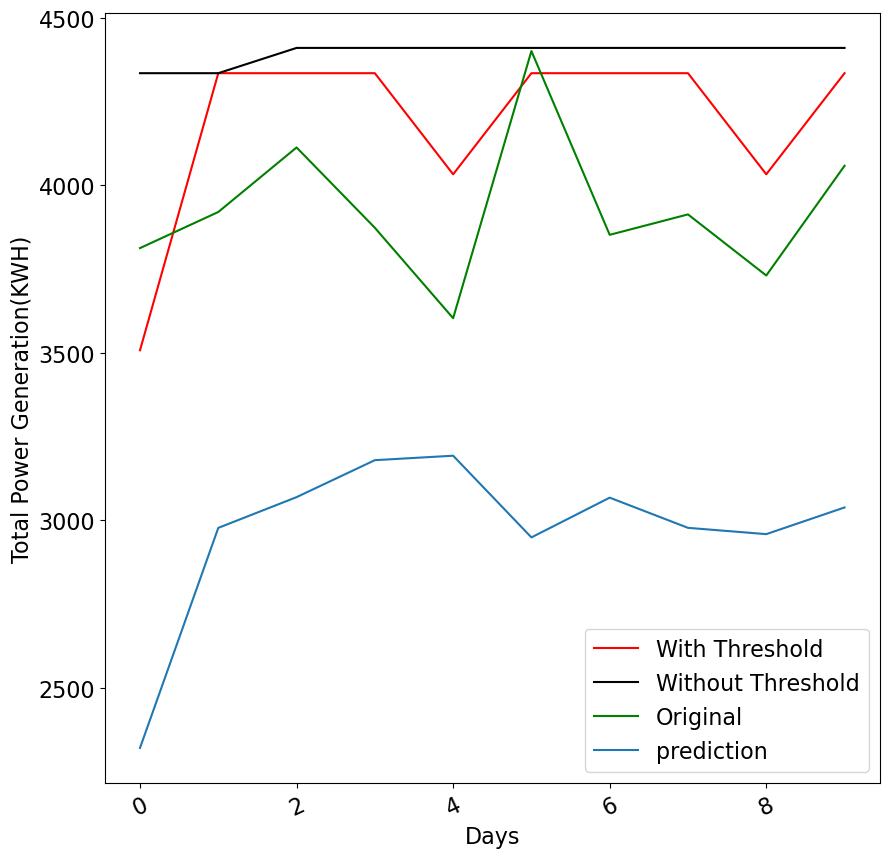

In [150]:
fig = plt.figure(figsize=(10,10))

plt.plot(count, Y_predrand_thr, c="r", label="With Threshold")
plt.plot(count, Y_predrand, c="black", label="Without Threshold")
plt.plot(count, Y_test, c="g", label='Original')
plt.plot(count, diff_power['Prediction'], label='prediction')
# plt.figtext(.15, .75, "RMSPE="+str(round(rmspe, 3))+"%", c='g')
plt.legend()
plt.xlabel("Days")
plt.ylabel("Total Power Generation(KWH)")
plt.xticks(rotation=25)
plt.show()

In [151]:
fig.savefig("result/"+str(forecast_days)+'_Days Prediction_for_threshold_without_threshold_regression', dpi=500)

## XG Boost

In [152]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [153]:
# Instantiation
import xgboost as xg

In [154]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
 
# Fitting the model
xgb_r.fit(X_train, Y_train)

[19:12:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [155]:
check_x_test = new_X_test.to_numpy()

In [156]:
check_x_test

array([[0, 0, 1, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 1, 0],
       [0, 0, 1, 0]], dtype=object)

In [157]:
# Predict the model
pred = xgb_r.predict(check_x_test)

In [158]:
pred

array([3394.5576, 4218.908 , 4218.908 , 4218.908 , 3925.518 , 4218.908 ,
       4218.908 , 4218.908 , 3925.518 , 4218.908 ], dtype=float32)

In [159]:
# RMSE Computation
rmse = round(np.sqrt(np.mean(np.square(((Y_test - pred) / Y_test)), axis=0))*100,3)
print("RMSPE : % f" %(rmse))

RMSPE :  7.452000


In [160]:
clf = GridSearchCV(xgb_r,parameters)
clf.fit(X_train,Y_train)
y_pred = clf.predict(check_x_test)

[19:12:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[19:12:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[19:12:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[19:12:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[19:12:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscal

In [161]:
# RMSE Computation
rmse = round(np.sqrt(np.mean(np.square(((Y_test - y_pred) / Y_test)), axis=0))*100,3)
print("RMSPE : % f" %(rmse))

RMSPE :  10.913000


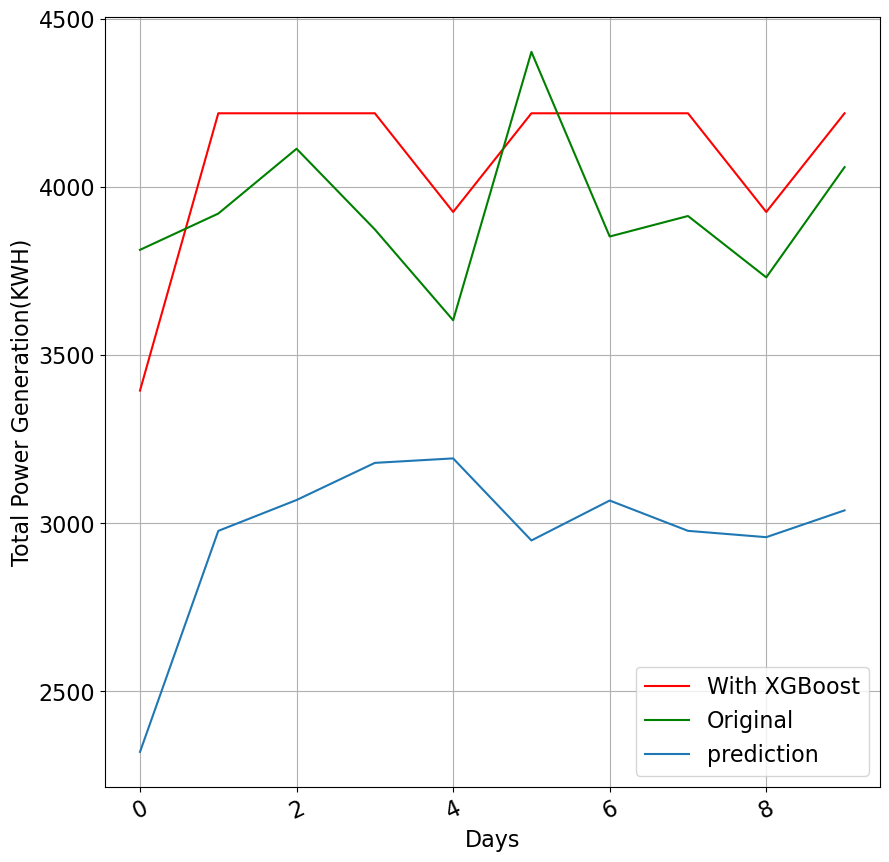

In [162]:
fig = plt.figure(figsize=(10,10))

plt.plot(count, pred, c="r", label="With XGBoost")
# plt.plot(count, Y_predrand, c="black", label="Without Threshold")
plt.plot(count, Y_test, c="g", label='Original')
plt.plot(count, diff_power['Prediction'], label='prediction')
# plt.figtext(.15, .75, "RMSPE="+str(round(rmspe, 3))+"%", c='g')
plt.legend()
plt.xlabel("Days")
plt.ylabel("Total Power Generation(KWH)")
plt.xticks(rotation=25)
plt.grid()
plt.show()

## new pattern wise scatter plot

In [163]:
previous_power = df_obj['2018']['Total Generation (KWH)'][-lag:]

In [164]:
diff_power['Prediction']

0    2320.370848
1    2977.434141
2    3069.224600
3    3179.610142
4    3192.938413
5    2948.998807
6    3067.692770
7    2977.558654
8    2958.736920
9    3038.402198
Name: Prediction, dtype: float64

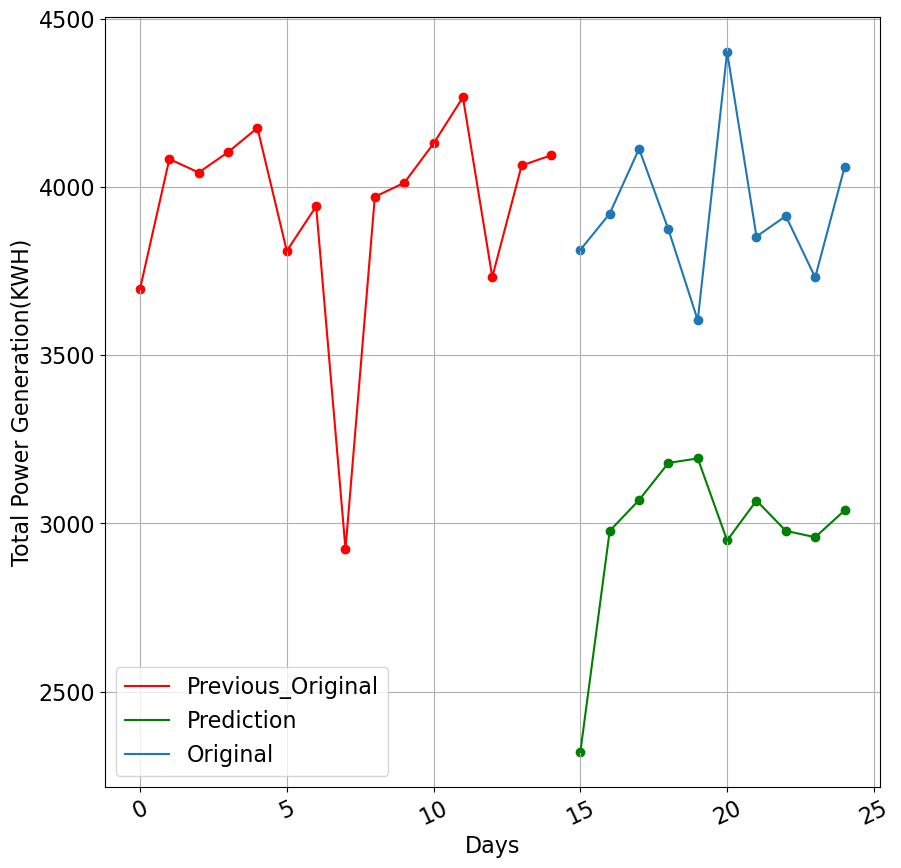

In [165]:
fig = plt.figure(figsize=(10,10))
font = {'size': 16}
plt.rc('font', **font)
range1 = range(len(previous_power))
range2 = range(len(previous_power), len(previous_power)+len(diff_power['Prediction']))
plt.scatter(range1, previous_power, c="r")
plt.plot(range1, previous_power, c="r", label="Previous_Original")
plt.scatter(range2, diff_power['Prediction'], c="g")
plt.plot(range2, diff_power['Prediction'], c="g", label="Prediction")
# plt.scatter('Date', 'Prediction', data=diff_power, label='Prediction', c='r')
plt.scatter(range2, diff_power['Original'])
plt.plot(range2, diff_power['Original'], label='Original')
plt.legend()
# plt.figtext(.68, .25, "RMSPE="+str(round(rmspe, 3))+"%", c='g')
# plt.figtext(.68, .2, "RMSE="+str(round(rmse, 3)), c='g')
# plt.figtext(.68, .15, "MAE="+str(round(mae, 3)), c='g')
plt.xticks(rotation=25)
plt.grid()
plt.xlabel("Days")
plt.ylabel("Total Power Generation(KWH)")
plt.show()
# plt.title(str(forecast_days)+'_Days Prediction_for_Binary_Var', fontsize=30)

In [166]:
#spider graph/chart

## Arima

In [167]:
import statsmodels as sm
from statsmodels.tsa.vector_ar.var_model import 

SyntaxError: invalid syntax (576078763.py, line 2)

In [ ]:
mod = sm.tsa.VARMAX()
# endog, order = (1, 0, 0))

In [ ]:
res_default_timeseries = sm.tsa.vector_ar.var_model.TimeSeriesModel(endog_array)

In [ ]:
res_default_timeseries.predict(df1[:forecast_days])